In [66]:
import numpy as np
%pylab inline
plt.style.use('plotting')
import matplotlib.ticker
from math import floor, ceil

Populating the interactive namespace from numpy and matplotlib


# split galaxies along x=0 (0/180 deg)

In [67]:
def plot_split_stats(split_string):
    plt.figure(figsize=(10,5))
    plt.clf()
    ax = subplot(121)
    ax2 = subplot(122)
    ids0 = np.loadtxt('M31analogs_noMM8Gyr_mstar.txt') #61                                                                                                   
    #print(len(ids0))   

    noMM_max = []
    MM_max = []

    noMM_avg = []
    MM_avg = []

    # no MM sample
    for id in ids0:
        id = int(id)
        #load SFR data for each half based on specific split 
        data = np.loadtxt('%s_SFR_time_avg_norecentMM_%ssplit.txt'%(id, split_string))
        
        # [4:] will only keep the SFRs for 1-4 Gyr rather than 0-4 Gyr; figure out whether left/right or right/left is greater
        ratio1 = data[:,1][4:]/data[:,2][4:]
        ratio2 = data[:,2][4:]/data[:,1][4:]
        ratio = [np.max([i,j]) for i,j in zip(ratio1,ratio2)]
        
        #remove analogs with SFRs that go to infinity 
        if inf in ratio:
            continue
        #take the maximum of the ratio of mean SFRs
        mean_ratios = [np.mean(data[:,1][4:])/np.mean(data[:,2][4:]), np.mean(data[:,2][4:])/np.mean(data[:,1][4:])]
        noMM_avg.append(np.max(mean_ratios))
        
        times = list(data[:,0][4:])
        ax.plot(times,ratio,color='C1',alpha=0.2)

    # repeat for MM sample 
    ids = np.loadtxt('M31analogs_MM1_4Gyr_mstar.txt')
    #print(len(ids))

    for id in ids:
        id = int(id)
        data = np.loadtxt('%s_SFR_time_avg_recentMM_%ssplit.txt'%(id, split_string))
        ratio1 = data[:,1][4:]/data[:,2][4:]
        ratio2 = data[:,2][4:]/data[:,1][4:]
        ratio = [np.max([i,j]) for i,j in zip(ratio1,ratio2)]
        ratio = np.nan_to_num(ratio)
        mean_ratios = [np.mean(data[:,1][4:])/np.mean(data[:,2][4:]), np.mean(data[:,2][4:])/np.mean(data[:,1][4:])]
        print(id, ratio1, ratio2, ratio, mean_ratios)
        if id == 400733:
            print('found')
            ax.plot(times,ratio,color='C3', lw=4)
            print(data[:,1][4:], data[:,2][4:])
        MM_avg.append(np.max(mean_ratios))
        times = list(data[:,0][4:])
        ax.plot(times,ratio,color='C0', lw=2)
        #if id == 413061:
        #    ax.plot(times,ratio,color='C2', lw=2)

    ax.set_yscale("log")
    ax.invert_xaxis()
    ax.set_xlabel('Age [Gyr]')
    ax.set_ylabel('SFR ratio')
    ax.set_ylim(1, 1e4)

    noMM_avg = np.nan_to_num(noMM_avg)
    MM_avg = np.nan_to_num(MM_avg)
    bin_range = np.max([np.max(noMM_avg), np.max(MM_avg)])
    print(bin_range,ceil(bin_range))
    bin_range = int(ceil(bin_range))
    ax2.hist(noMM_avg, bins=bin_range,range=(0,bin_range), color='C1',alpha=0.4,density=True, stacked=True, label='no recent MM (%s)'%len(noMM_avg))
    ax2.hist(MM_avg, bins=bin_range, range=(0,bin_range),color='C0',alpha=0.4, density=True,stacked=True,label='recent MM (%s)'%len(MM_avg))
    ax2.set_xlabel('ratio of SFR mean')
    ax2.set_ylabel('probability density')
    ax2.legend()

    print('no MMs:',len(noMM_avg))#, np.sort(noMM_avg))
    print('MMs:',len(MM_avg))
    #print(np.sort(noMM_avg))
    #print(MM_avg, MM_max, ids)
    plt.tight_layout()
    return

390429 [0.85250466 1.47606837 0.29374307 1.00725514] [1.17301411 0.67747539 3.40433558 0.99279712] [1.17301411 1.47606837 3.40433558 1.00725514] [0.765901140721625, 1.305651534945893]
392084 [2.67162651e-01 5.67052749e-03 2.02698406e-01 4.79805808e+02] [3.74303816e+00 1.76350437e+02 4.93343792e+00 2.08417652e-03] [  3.74303816 176.35043684   4.93343792 479.80580808] [0.23046852999287717, 4.338987192875773]
392544 [16.06317562 32.80614014 17.32787132  0.54359532] [0.06225419 0.0304821  0.05771049 1.83960376] [16.06317562 32.80614014 17.32787132  1.83960376] [2.2081084782615124, 0.45287630107163934]
396140 [1.20275534 1.09876307 0.73210255 0.25013041] [0.83142429 0.91011432 1.36592886 3.99791452] [1.20275534 1.09876307 1.36592886 3.99791452] [0.6952384545487246, 1.4383554210175191]
400733 [4.71167112e-02 3.37900166e-01 2.84193920e-01 1.81559101e+03] [2.12238922e+01 2.95945400e+00 3.51872412e+00 5.50784839e-04] [  21.2238922     2.959454      3.51872412 1815.59100582] [0.40372191607999613

/Users/ektapatel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
/Users/ektapatel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


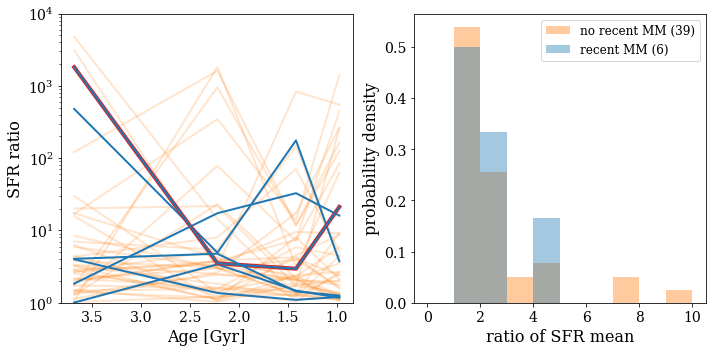

In [68]:
plot_split_stats('x0')

# split galaxies at y=0 (90 degrees)

/Users/ektapatel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
/Users/ektapatel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


390429 [1.06110939 0.9245217  1.05853088 0.65337679] [0.94240991 1.08164038 0.94470556 1.53051045] [1.06110939 1.08164038 1.05853088 1.53051045] [0.8920868093474882, 1.1209671407779747]
392084 [0.2076643  0.0586923  0.02732738 0.00208418] [  4.81546419  17.03800877  36.59333088 479.80580808] [  4.81546419  17.03800877  36.59333088 479.80580808] [0.09541450580102426, 10.4805866949139]
392544 [2.08993329e+00 1.06264267e+01 1.41503975e-01 6.09984613e+02] [4.78484172e-01 9.41050106e-02 7.06693927e+00 1.63938561e-03] [  2.08993329  10.62642673   7.06693927 609.98461328] [2.2316691627207876, 0.4480950925453612]
396140 [1.35111183 0.47339117 0.26201211 0.94388376] [0.74013119 2.11241793 3.81661754 1.05945249] [1.35111183 2.11241793 3.81661754 1.05945249] [0.6219056543553313, 1.6079609390858522]
400733 [8.61918231e-04 8.38292732e-02 5.91284160e+01 1.40408257e+00] [1.16020286e+03 1.19290072e+01 1.69123421e-02 7.12208829e-01] [1160.20286432   11.92900715   59.12841604    1.40408257] [0.375942329

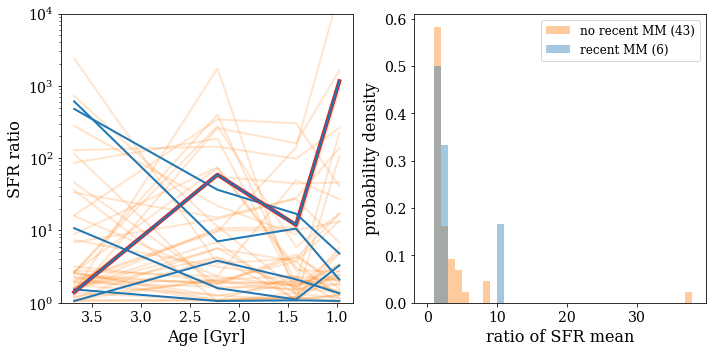

In [69]:
plot_split_stats('y0')

# split galaxies along m=1 (45 degrees)

/Users/ektapatel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
/Users/ektapatel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


390429 [1.06717939 1.15395522 0.57212908 0.87967166] [0.93704958 0.86658476 1.74785732 1.13678778] [1.06717939 1.15395522 1.74785732 1.13678778] [0.8325893129123272, 1.2010723468237712]
392084 [0.127014   0.0042269  0.0137206  0.04963694] [  7.87314807 236.58011554  72.88309838  20.14628777] [  7.87314807 236.58011554  72.88309838  20.14628777] [0.05251417966994709, 19.042475885275646]
392544 [18.1161843  58.4499345   1.06287855  3.95218604] [0.05519926 0.01710866 0.94084127 0.25302453] [18.1161843  58.4499345   1.06287855  3.95218604] [3.290739862441497, 0.3038830298965262]
396140 [1.18225508 0.57505569 0.34513998 0.56094492] [0.84584115 1.73896202 2.89737518 1.78270623] [1.18225508 1.73896202 2.89737518 1.78270623] [0.5795182864099008, 1.7255710880065087]
400733 [4.34428956e-04 1.12853739e-01 2.27166942e+02 8.26219652e+00] [2.30187235e+03 8.86102672e+00 4.40204896e-03 1.21033190e-01] [2301.87234576    8.86102672  227.1669417     8.26219652] [0.5001275065769741, 1.9994901037223616]
fo

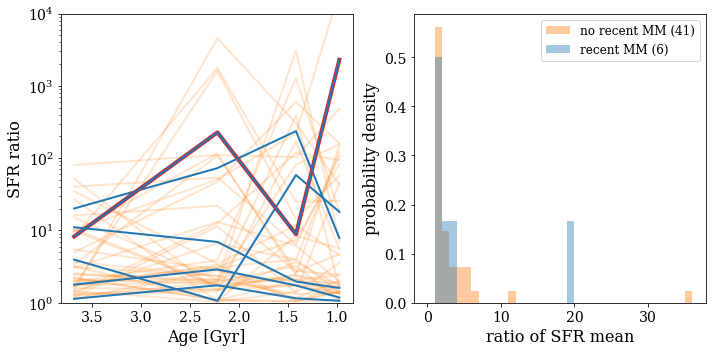

In [70]:
plot_split_stats('m1')

# split galaxies along m=-1 (135 deg)

/Users/ektapatel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
/Users/ektapatel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


390429 [1.06717939 1.15395522 0.57212908 0.87967166] [0.93704958 0.86658476 1.74785732 1.13678778] [1.06717939 1.15395522 1.74785732 1.13678778] [0.8325893129123272, 1.2010723468237712]
392084 [0.127014   0.0042269  0.0137206  0.04963694] [  7.87314807 236.58011554  72.88309838  20.14628777] [  7.87314807 236.58011554  72.88309838  20.14628777] [0.05251417966994709, 19.042475885275646]
392544 [18.1161843  58.4499345   1.06287855  3.95218604] [0.05519926 0.01710866 0.94084127 0.25302453] [18.1161843  58.4499345   1.06287855  3.95218604] [3.290739862441497, 0.3038830298965262]
396140 [1.18225508 0.57505569 0.34513998 0.56094492] [0.84584115 1.73896202 2.89737518 1.78270623] [1.18225508 1.73896202 2.89737518 1.78270623] [0.5795182864099008, 1.7255710880065087]
400733 [4.34428956e-04 1.12853739e-01 2.27166942e+02 8.26219652e+00] [2.30187235e+03 8.86102672e+00 4.40204896e-03 1.21033190e-01] [2301.87234576    8.86102672  227.1669417     8.26219652] [0.5001275065769741, 1.9994901037223616]
fo

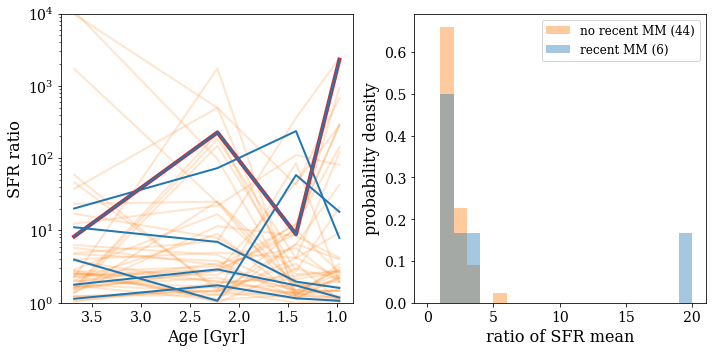

In [71]:
plot_split_stats('m-1')
r1 = [4.34428956e-04, 1.12853739e-01, 2.27166942e+02, 8.26219652e+00]
r2 = [2.30187235e+03, 8.86102672e+00, 4.40204896e-03, 1.21033190e-01]
print(np.mean(r1), np.mean(r2))

# try plotting the histogram of maximum ratios for all angles tried

In [72]:
def find_max_angle():
    ids0 = np.loadtxt('M31analogs_noMM8Gyr_mstar.txt') #61  
    ids = np.loadtxt('M31analogs_MM1_4Gyr_mstar.txt') #6
    noMM_max = []
    MM_max = []

    split_strings = ['y0', 'x0', 'm1', 'm-1']    
    
    for id in ids0:
        id = int(id)
        temp_ratios = []
        
        for split_string in split_strings: 
            #print(split_string)
            #for a given split, save the max SFR ratio of the mean SFR based on left/right vs. right/left
            data = np.loadtxt('%s_SFR_time_avg_norecentMM_%ssplit.txt'%(id, split_string))
            ratio1 = data[:,1][4:]/data[:,2][4:]
            ratio2 = data[:,2][4:]/data[:,1][4:]
            ratio = [np.max([i,j]) for i,j in zip(ratio1,ratio2)]
            if inf in ratio:
                continue
            #ratio = np.nan_to_num(ratio)
            mean_ratios = [np.mean(data[:,1][4:])/np.mean(data[:,2][4:]), np.mean(data[:,2][4:])/np.mean(data[:,1][4:])]
            this_ratio = np.max(mean_ratios)
            temp_ratios.append(this_ratio)
            if this_ratio > 30.:
                print(split_string)
        if len(temp_ratios) >=1:
            noMM_max.append(np.max(temp_ratios))
            if np.max(temp_ratios)> 30.:
                print(id)
        #print(temp_ratios, noMM_max)
        
    for id in ids:
        id = int(id)
        temp_ratios = []
        print(id)
        for split_string in split_strings: 
            #print(split_string)
            #for a given split, save the max SFR ratio of the mean SFR based on left/right vs. right/left
            data = np.loadtxt('%s_SFR_time_avg_recentMM_%ssplit.txt'%(id, split_string))
            ratio1 = data[:,1][4:]/data[:,2][4:]
            ratio2 = data[:,2][4:]/data[:,1][4:]
            ratio = [np.max([i,j]) for i,j in zip(ratio1,ratio2)]
            if inf in ratio:
                continue
            #ratio = np.nan_to_num(ratio)
            mean_ratios = [np.mean(data[:,1][4:])/np.mean(data[:,2][4:]), np.mean(data[:,2][4:])/np.mean(data[:,1][4:])]
            this_ratio = np.max(mean_ratios)
            temp_ratios.append(this_ratio)
        if len(temp_ratios) >=1:
            MM_max.append(np.max(temp_ratios))
        #print(temp_ratios, noMM_max)
        
              
    return noMM_max, MM_max


y0
357697
m1
389030
390429
392084
392544
396140
400733
413061
19.042475885275646 37.89604403612116


/Users/ektapatel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/Users/ektapatel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide


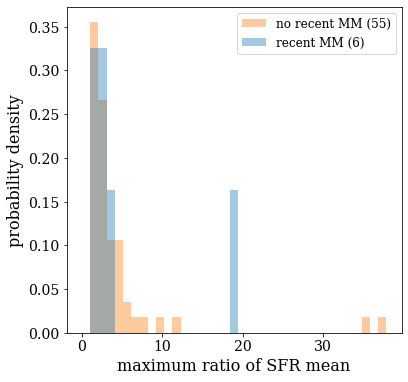

In [73]:
noMMs, MMs = find_max_angle()

plt.figure(figsize=(6,6))
bin_range = np.max([np.max(MMs), np.max(noMMs)])
print(np.max(MMs), np.max(noMMs))
plt.hist(noMMs, bins=int(bin_range),range=(0,bin_range), color='C1',alpha=0.4,density=True, stacked=True, label='no recent MM (%s)'%len(noMMs))
plt.hist(MMs, bins=int(bin_range), range=(0,bin_range),color='C0',alpha=0.4, density=True,stacked=True,label='recent MM (%s)'%len(MMs))
plt.xlabel('maximum ratio of SFR mean')
plt.ylabel('probability density')
plt.legend()

